In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

## This notebook demonstrates effect of Dimensionality reduction on the Efficiency of the in-built classifiers from scikit learn's library with regards to
(a) Various synthetic dataset with varing noise Variance levels. (b) Range of dimensions after performing dimensionality reduction.

The point of this example is to illustrate the nature of different datasets after dimesnsinality reduction and passig them to different classifiers. This should be taken with a grain of salt, as the intuition conveyed by these examples does not necessarily carry over to real datasets.

Experiments were performed to see effect of reducing dataset dimensions from high dimensional space to a lower dimensions for classification. For Dimensionality reduction, inbuilt algorithm from sklearn were considered. For classification pre-established sklearn algorithms are used.

In [4]:
names = ["KNN","Random Forest", "svm"]
classifiers = [
    KNeighborsClassifier(5),
    RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'),
    SVC(kernel="linear", C=0.025)]

Datasets used have 2 signal dimensions each along with 98 noise dimensions. For generating synthetic noise establish sklearn algorithms were used. Noise is a gaussian noise with mean of 0 and varing variance. Noise Dimensions are concatinated to Signal Dimensions to make each dataset of shape with arounf 10 dimensions.

In [5]:
def make_dataset(n_samples, n_features):
    Noise_labels = []
    Noise_datasets = []
    v = [0.1, 1, 10]
    for u in v:
        dataset = []
        label = []
        Moons = make_moons(n_samples=n_samples, shuffle=True, noise=.05)
        df = StandardScaler().fit_transform(Moons[0])
        df1 = pd.DataFrame(df,columns=['x'+str(i) for i in range(1,n_features+1)])
        Noise_moon = np.random.normal(0, u,[n_samples, 98])
        df_noise1 = (pd.DataFrame(Noise_moon, columns=['dim'+ str(i) for i in range(1,98+1)]))
        dataset_noise1 = (pd.concat([df1, df_noise1],axis = 1))
        X1 = dataset_noise1.iloc[:, :].values 

        Classification = make_classification(n_samples = n_samples, n_features=n_features, n_redundant=0, n_informative=n_features, n_clusters_per_class=1, random_state=8)
        df22 = StandardScaler().fit_transform(Classification[0])
        df2 = pd.DataFrame(df22,columns=['x'+str(i) for i in range(1,n_features+1)])
        Noise_class = np.random.normal(0, u,[n_samples, 98])
        df_noise2 = (pd.DataFrame(Noise_class, columns=['dim'+ str(i) for i in range(1,98+1)]))
        dataset_noise2 = (pd.concat([df2, df_noise2],axis = 1))
        X2 = dataset_noise2.iloc[:, :].values

        Blobs = make_blobs(n_samples=n_samples, centers=n_features, cluster_std=1.0, shuffle=True, random_state=8)
        df33 = StandardScaler().fit_transform(Blobs[0])
        df3 = pd.DataFrame(df33,columns=['x'+str(i) for i in range(1,n_features+1)])
        Noise_blobs = np.random.normal(0, u,[n_samples, 98])
        df_noise3 = (pd.DataFrame(Noise_blobs, columns=['dim'+ str(i) for i in range(1,98+1)]))
        dataset_noise3 = (pd.concat([df3, df_noise3],axis = 1))
        X3 = dataset_noise3.iloc[:, :].values
        
        dataset = [X1, X2, X3]
        label = [Moons[1], Classification[1], Blobs[1] ]
        
        Noise_datasets += dataset
        Noise_labels += label
    
    return(Noise_datasets, Noise_labels)

#Moon, Classification, Blob x3

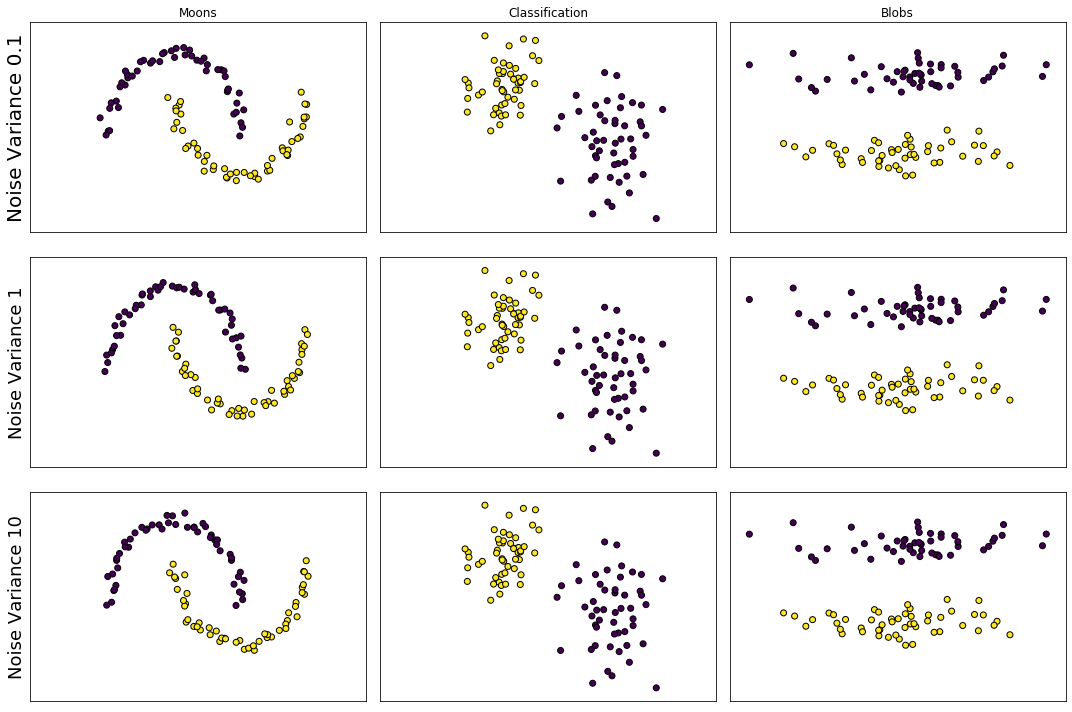

In [49]:
Xp,Yp = make_dataset(100,2)
fig1, axs11 = plt.subplots(3, 3, figsize=((15,10)),sharex=True, sharey=True )
(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9) = axs11
ax1.scatter(Xp[0][:,0], Xp[0][:,1], c= Yp[0], edgecolors='k')
ax1.set_ylabel('Noise Variance 0.1', fontsize = 20)
ax1.title.set_text('Moons')
ax2.scatter(Xp[1][:,0], Xp[1][:,1], c= Yp[1], edgecolors='k')
ax2.title.set_text('Classification')
ax3.scatter(Xp[2][:,0], Xp[2][:,1], c= Yp[2], edgecolors='k')
ax3.title.set_text('Blobs')
ax4.scatter(Xp[3][:,0], Xp[3][:,1], c= Yp[3], edgecolors='k')
ax4.set_ylabel('Noise Variance 1', fontsize=18)
ax5.scatter(Xp[4][:,0], Xp[4][:,1], c= Yp[4], edgecolors='k')
ax6.scatter(Xp[5][:,0], Xp[5][:,1], c= Yp[5], edgecolors='k')
ax7.scatter(Xp[6][:,0], Xp[6][:,1], c= Yp[6], edgecolors='k')
ax7.set_ylabel('Noise Variance 10', fontsize=18)
ax8.scatter(Xp[7][:,0], Xp[7][:,1], c= Yp[7], edgecolors='k')
ax9.scatter(Xp[8][:,0], Xp[8][:,1], c= Yp[8], edgecolors='k')

plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

In [7]:
#Performing Classification function for 1 dataset
def perform_classification(X,Y):
    j = 1

    for name, clf in zip(names, classifiers):
        dim_rep = []
        score_rep = []
        #Each Dimensions
        for j in range (100 , 1 , -1):
            pca = PCA(n_components=j)
            principalComponents = pca.fit_transform(X)
            principalDf = pd.DataFrame(data = principalComponents
                         , columns = ['principal component'+str(i) for k in range(1,1+j)])
            principalDf['y'] = Y

            a = principalDf.iloc[:, :-1].values
            b = principalDf['y']
            X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=.4)

            clf.fit(X_train, y_train)
            score_dim = clf.score(X_test, y_test)
            score_rep.append(score_dim)
            dim_rep.append(j)

        if (name == "KNN" ):
            dim_knn = dim_rep
            score_knn = score_rep
        elif (name == "Random Forest"):
            dim_rf = dim_rep
            score_rf = score_rep
        else:
            dim_svm = dim_rep
            score_svm = score_rep
        
    return (dim_knn,score_knn,score_rf,score_svm)

In [8]:
#Plotting function
def plot_graph(dim_all,sknn,srf,ssvm):    
    event=[]
    for i in range(0,len(dim_all)):
        event.append('KNN')
    for j in range(0,len(dim_all)):
        event.append('RF')
    for k in range(0,len(dim_all)):
        event.append('SVM')

    dims=np.concatenate((dim_all,dim_all,dim_all))
    scores=np.concatenate((sknn,srf,ssvm))

    data={'Number of Noise Dimensions':dims,'Acc':scores,'Event':event}
    
    return(data)

In [43]:
sim=100
data_rf_acc=[]
data_svm_acc = [] 
data_knn_acc = []
data_num_dims = []
data = []

for i in range(0,len(Xp)):
    data_rf_acc.append([])
    data_svm_acc.append([]) 
    data_knn_acc.append([])
    data_num_dims.append([])
    data.append([])
    
for i in range(sim):
    Xp,Yp = make_dataset(100,2)
    
    for index,(X,Y) in enumerate(zip(Xp,Yp)):
        temp_score_knn = []
        temp_score_rf = []
        temp_score_svm = []
        n_dims = []
        dim_n,score_knn,score_rf,score_svm = perform_classification(X,Y)
        
        temp_score_knn += score_knn
        temp_score_rf += score_rf
        temp_score_svm += score_svm
        n_dims += dim_n
        
        data_knn_acc[index]+=temp_score_knn
        data_svm_acc[index] += temp_score_svm
        data_rf_acc[index] += temp_score_rf
        data_num_dims[index] += n_dims
        
    for ind in range(len(Xp)):
        data[ind] = plot_graph(data_num_dims[ind],data_knn_acc[ind],data_rf_acc[ind],data_svm_acc[ind])

Text(-0.05, 0.5, 'Accuracy')

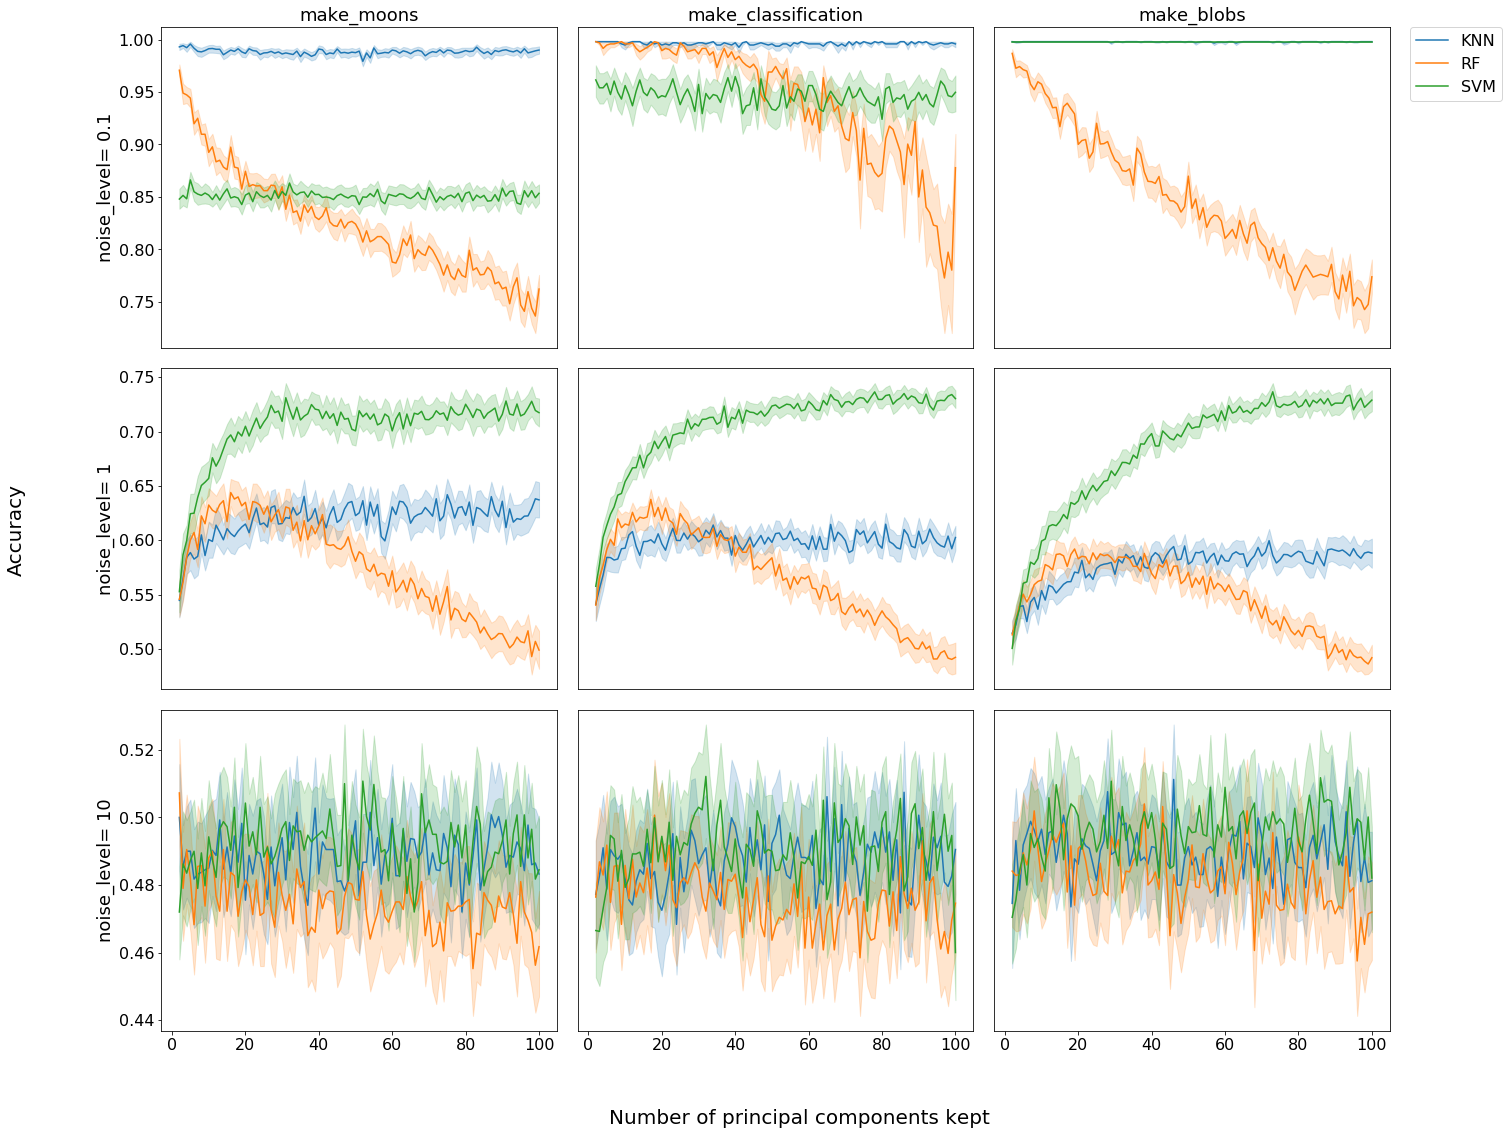

In [58]:
plt.rcParams.update({'font.size': 16})
titles=[['make_moons','make_classification','make_blobs']]*3
data1 =[[data[0],data[1],data[2]],[data[3],data[4],data[5]],[data[6],data[7],data[8]]]
noise_levels=[0.1,1,10]
noise=[['0.1'],['1'],['10']]*3
fig,axes=plt.subplots(len(data1),len(noise_levels),figsize=(20,15),sharex=True,sharey=True)
for i in range(0,len(data1)):
    for j in range(len(noise_levels)):
        z=i*len(data1)+j+1
        plt.subplot(len(data1),len(noise_levels),z)
        ax=sns.lineplot(x='Number of Noise Dimensions',y='Acc',hue='Event',data=data1[i][j])
        if z!=len(data1):
            ax.legend_.remove()
        else:
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        if z<=len(data1):
            plt.title(titles[i][j], fontsize = 18)
        if z<=len(data1)*(len(noise_levels)-1):
            plt.gca().xaxis.set_major_locator(plt.NullLocator())
        if z%len(data1)==1:
            plt.ylabel('noise_level= '+str(noise[i][j]), fontsize = 18)
        else:
            plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.tight_layout()   

fig.text(0.5, -0.05, 'Number of principal components kept', ha='center', fontsize = 20)
fig.text(-0.05, 0.5, 'Accuracy', va='center', rotation='vertical', fontsize = 20)

        

## Inference :
In the plot we can see different trends with respect to the different shapes of the dataset.

In case of Blobs, Number of dimensions help in clasification of the dataset. As we try to reduce dimensions, Accuracy of the classification for classifiers decresses steadyly. In case of Moons and Classification_dataset, there is not much change in accuracy of the classiers till a particular dimentional threshould. After that a considerable spike is observed indicating exponential cahnges in the accuracy of the classifiers.

In case of Classifiers, RF increase in accuracy when dimensions are reduced, KNN stays pretty constant with respect to dimentions reduction. but SVM decreses in accuracy when it comes to reduced dimensions.

Increasing the noise will make accuracies fluctuate over a mean value. 